<a href="https://colab.research.google.com/github/TAUforPython/machinelearning/blob/main/GNN%20simple%20example%20Graph%20Convolution%20Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

import pandas as pd

# Graph Neural Network model define

In [2]:
class GCNConv(nn.Module):
    def __init__(self, A, in_channels, out_channels):
        super(GCNConv, self).__init__()
        self.A_hat = A+torch.eye(A.size(0))
        self.D     = torch.diag(torch.sum(A,1))
        self.D     = self.D.inverse().sqrt()
        self.A_hat = torch.mm(torch.mm(self.D, self.A_hat), self.D)
        self.W     = nn.Parameter(torch.rand(in_channels,out_channels, requires_grad=True))

    def forward(self, X):
        out = torch.relu(torch.mm(torch.mm(self.A_hat, X), self.W))
        return out

In [3]:
class GraphNet(torch.nn.Module):
    def __init__(self,A, nfeat, nhid, nout):
        super(GraphNet, self).__init__()
        self.conv1 = GCNConv(A,nfeat, nhid)
        self.conv2 = GCNConv(A,nhid, nout)

    def forward(self,X):
        H  = self.conv1(X)
        H2 = self.conv2(H)
        return H2

# Graph define (adj matrix)

In [4]:
# 'A' is the adjacency matrix, it contains 1 at a position (i,j) if there is a edge between the node i and node j.
A=torch.Tensor([[0,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0],
                [1,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0],
                [1,1,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0],
                [1,1,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                [1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                [1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                [1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                [1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                [1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1],
                [0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1],
                [1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                [1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                [1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1],
                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
                [0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                [1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
                [1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1],
                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
                [1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,1],
                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0],
                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0],
                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1],
                [0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1],
                [0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1],
                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1],
                [0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
                [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1],
                [0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,1,0,1,1,0,0,0,0,0,1,1,1,0,1],
                [0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,1,0,0,1,1,1,0,1,1,0,0,1,1,1,1,1,1,1,0]
                ])

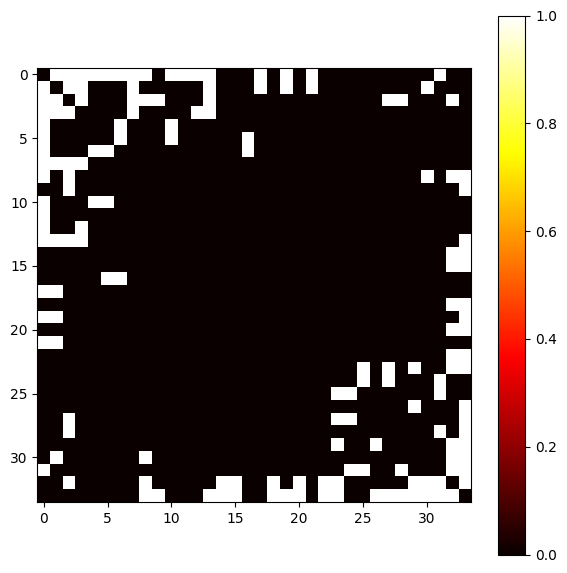

In [5]:
fig=plt.figure(figsize=(7,7))
plt.imshow(A, cmap="hot",vmin=0, vmax=1)
plt.colorbar()

In [6]:
#In this example we have the label for admin(node 1)
#and instructor(node 34) so only these two contain
#the class label(0 and 1) all other are set to -1,
#which means that the predicted value of these nodes
#will be ignores in the computation of loss function.

target=torch.tensor([0,-1,-1,-1, -1, -1, -1, -1,-1,-1,-1,-1, -1, -1, -1, -1,-1,-1,-1,-1, -1, -1, -1, -1,-1,-1,-1,-1, -1, -1, -1, -1,-1,1])

In [7]:
# X - is a feature matrix
X=torch.eye(A.size(0))

In [8]:
import networkx as nx
import matplotlib.pyplot as plt

In [9]:
# convert Tensor adjacent matrix to simple numpy array
Anpmat = A.numpy()
G = nx.from_numpy_array(Anpmat)

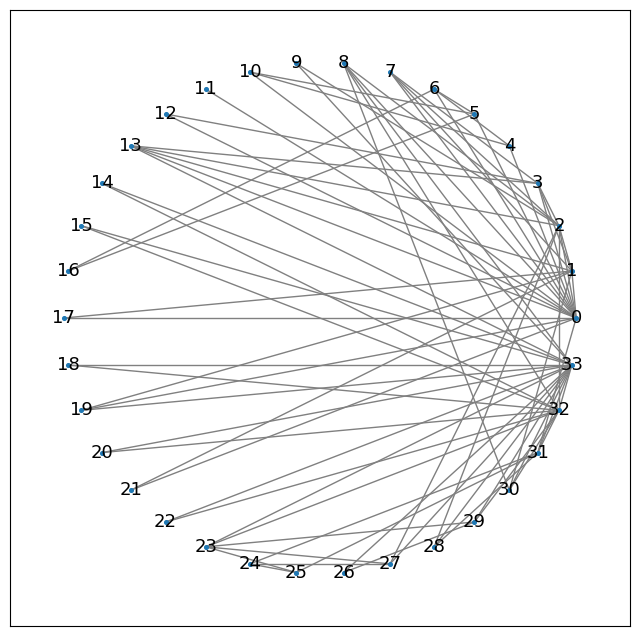

In [10]:
plt.figure(figsize=(8, 8))

nx.draw_networkx(G, pos=nx.circular_layout(G), node_size=7, font_size = 13,edge_color ='grey')

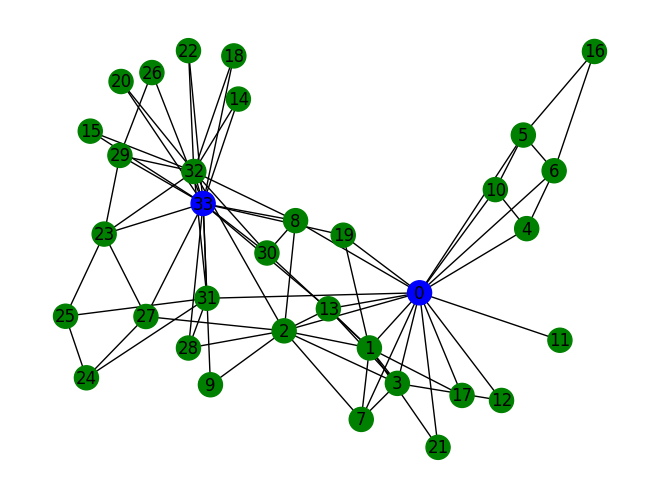

In [11]:
color_map = []
for node in G:
    if node == 0 or node == 33:
        color_map.append('blue')
    else:
        color_map.append('green')
nx.draw(G, node_color=color_map, with_labels=True)
plt.show()

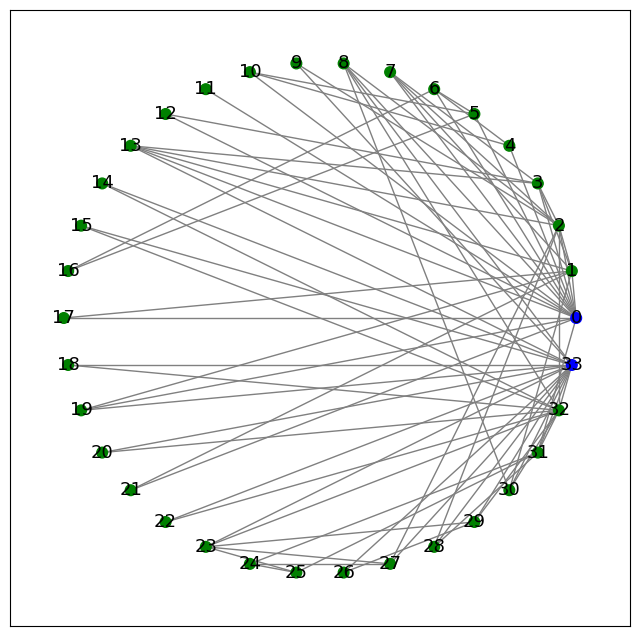

In [12]:
plt.figure(figsize=(8, 8))

nx.draw_networkx(G, pos=nx.circular_layout(G), node_size=59, font_size = 13, edge_color ='grey',node_color=color_map)

# Graph define (nodes and edges from dataframe)

In [13]:
!pip install -q torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 44.3 MB/s eta 0:00:00


In [14]:
from torch_geometric.utils import from_networkx, to_networkx

import torch
import tensorflow as tf
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from torch_geometric.utils import remove_isolated_nodes, degree
from collections import Counter
from sklearn.manifold import TSNE

In [16]:
graph_patient_df = pd.read_csv("data_HTF.csv", sep=";", decimal=",")

In [17]:
graph_patient_df

,source,target,edge_weights,nf1,nf2,nf3,class
0,3,1,3,11,37.3,37.1,1
1,7,1,2,10,37.8,37.7,1
2,2,1,3,11,37.1,37.2,1
3,3,0,2,10,37.2,37.3,1
4,2,1,0,10,37.7,37.0,1
...,...,...,...,...,...,...,...
145,2,0,0,1,36.7,36.6,3
146,2,0,0,1,36.5,36.6,3
147,2,0,0,1,36.6,36.6,3
148,7,0,0,1,36.6,36.6,3


In [18]:
# Create an edges array (sparse adjacency matrix) of shape [2, num_edges].
edges = graph_patient_df[["source", "target"]].to_numpy().T
# Create an edge weights array of ones.
edge_weights = tf.ones(shape=edges.shape[1])*graph_patient_df['edge_weights']/max(graph_patient_df['edge_weights'])
# Create a node features array of shape [num_nodes, num_features].

#feature_names  = list(set(graph_patient_df.columns) - {"class"})

feature_names  = list(set(graph_patient_df.columns) - {"class"} - {"source"} - {"target"})


node_features = tf.cast(
    graph_patient_df.sort_values("class")[feature_names].to_numpy(), dtype=tf.dtypes.float32
)

# Create graph info tuple with node_features, edges, and edge_weights.
graph_patient_visits = (node_features, edges, edge_weights)

print("Edges shape:", edges.shape)
print("Nodes shape:", node_features.shape)

Edges shape: (2, 150)
Nodes shape: (150, 4)


In [19]:
# Function to convert edge list to adjacency matrix
def convert_to_adjacency_matrix(edge_list, num_vertices):
  # Initialize the adjacency matrix with all zeros
  adj_mat = [[0 for _ in range(num_vertices)] for _ in range(num_vertices)]

  # Iterate through all the edges
  for edge in edge_list:
    # Get the source and destination nodes
    source = edge[0]
    destination = edge[1]

    # Mark the edge between source and destination in adjacency matrix
    adj_mat[source][destination] = 1

    #  Mark the edge between destination and source in adjacency matrix
    # (since the graph is bidirectional)
    adj_mat[destination][source] = 1

  return adj_mat

#edge_list = [[0, 1], [0, 2], [1, 2], [1, 3], [2, 4], [2, 5], [2,1]]
# There are 6 vertices/nodes in total
# The first vertex/node is labelled as 0
# And the last vertex/node is labelled as 5
num_vertices = edges.shape[1]
adj_mat = convert_to_adjacency_matrix(edges, num_vertices)

In [20]:

data = {
    'source': graph_patient_df['source'],
    'target': graph_patient_df['target']
}
df = pd.DataFrame(data)

# Получаем список всех уникальных вершин
nodes = sorted(set(df['source']).union(set(df['target'])))
#nodes = range(151)

# Создаём матрицу смежности (n x n), заполненную нулями
adj_matrix = pd.DataFrame(
    0,
    index=nodes,
    columns=nodes,
    dtype=int
)

# Заполняем матрицу (для невзвешенного графа ставим 1, если есть ребро)
for _, row in df.iterrows():
    adj_matrix.loc[row['source'], row['target']] = 1

# Если граф неориентированный, добавляем обратные рёбра
# adj_matrix.loc[row['target'], row['source']] = 1

print(adj_matrix)

    0   1   2   3   4   5   7   10  18  19  24  27
0    0   0   0   0   0   0   0   0   0   0   0   0
1    0   0   0   0   0   0   0   0   0   0   0   0
2    1   1   1   0   0   0   0   0   0   0   0   0
3    1   1   1   1   0   0   0   0   0   0   0   0
4    1   1   0   0   1   0   0   0   0   0   0   0
5    0   0   0   0   0   0   0   0   0   0   0   0
7    1   1   0   1   0   1   0   0   0   0   0   0
10   0   0   0   0   0   0   0   0   0   0   0   0
18   1   0   1   0   0   0   0   0   0   0   0   0
19   0   0   0   0   0   0   0   0   0   0   0   0
24   1   1   0   0   0   0   0   0   0   0   0   0
27   1   1   0   0   0   0   0   1   0   1   0   0


In [21]:
from scipy.sparse import csr_matrix


nodes = sorted(set(graph_patient_df['source']).union(set(graph_patient_df['target'])))


node_ids = {node: idx for idx, node in enumerate(nodes)}
rows = graph_patient_df['source'].map(node_ids)
cols = graph_patient_df['target'].map(node_ids)
adj_sparse = csr_matrix(([1]*len(rows), (rows, cols)), shape=(len(nodes), len(nodes)))

In [22]:
# Считаем количество рёбер между каждой парой вершин
weighted_edges = graph_patient_df.groupby(['source', 'target']).size().reset_index(name='weight')

# Получаем список всех уникальных вершин
nodes = sorted(set(graph_patient_df['source']).union(set(graph_patient_df['target'])))

# Создаём матрицу смежности, заполняя её весами
adj_matrix = pd.DataFrame(
    0,
    index=nodes,
    columns=nodes,
    dtype=int
)

# Заполняем матрицу весами рёбер
for _, row in weighted_edges.iterrows():
    adj_matrix.loc[row['source'], row['target']] = row['weight']

print("Взвешенная матрица смежности (число связей):")
print(adj_matrix)

Взвешенная матрица смежности (число связей):
    0   1   2   3   4   5   7   10  18  19  24  27
0    0   0   0   0   0   0   0   0   0   0   0   0
1    0   0   0   0   0   0   0   0   0   0   0   0
2   29   9  10   0   0   0   0   0   0   0   0   0
3   28  22   5   2   0   0   0   0   0   0   0   0
4    4   1   0   0   1   0   0   0   0   0   0   0
5    0   0   0   0   0   0   0   0   0   0   0   0
7    6   8   0   2   0   1   0   0   0   0   0   0
10   0   0   0   0   0   0   0   0   0   0   0   0
18   2   0   1   0   0   0   0   0   0   0   0   0
19   0   0   0   0   0   0   0   0   0   0   0   0
24   5   1   0   0   0   0   0   0   0   0   0   0
27   9   2   0   0   0   0   0   1   0   1   0   0


In [23]:
def weighted_adj_matrix(df):
## нужны колонки source и target
# Считаем количество рёбер между каждой парой вершин
  weighted_edges = df.groupby(['source', 'target']).size().reset_index(name='weight')

  # Получаем список всех уникальных вершин
  nodes = sorted(set(df['source']).union(set(df['target'])))

  # Создаём матрицу смежности, заполняя её весами
  adj_matrix = pd.DataFrame(
    0,
    index=nodes,
    columns=nodes,
    dtype=int
  )

  # Заполняем матрицу весами рёбер
  for _, row in weighted_edges.iterrows():
    adj_matrix.loc[row['source'], row['target']] = row['weight']

  return adj_matrix

adj_matrix = weighted_adj_matrix(graph_patient_df)


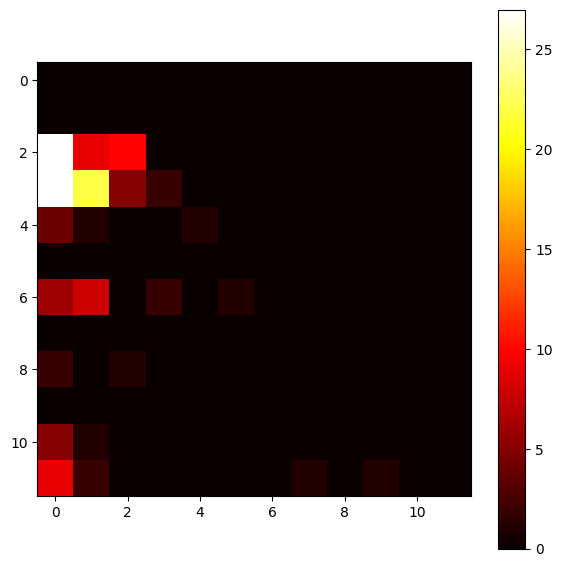

In [24]:
fig=plt.figure(figsize=(7,7))
#plt.imshow(adj_sparse.toarray(), cmap="hot",vmin=0, vmax=1)
plt.imshow(adj_matrix, cmap="hot",vmin=0, vmax=max(adj_matrix))
plt.colorbar()
adj_mat = adj_sparse.toarray()

In [25]:
G = nx.from_numpy_array(np.array(adj_mat))


data = from_networkx(G)

In [26]:
data.x = torch.tensor(graph_patient_df.sort_values("class")[feature_names].to_numpy()).float()

target = graph_patient_df[["class"]].to_numpy().T
#data.y = target
data.y = torch.tensor(target[0])

data.weight = edge_weights

data.num_node_features = data.x.shape[1]
data.num_classes = 3

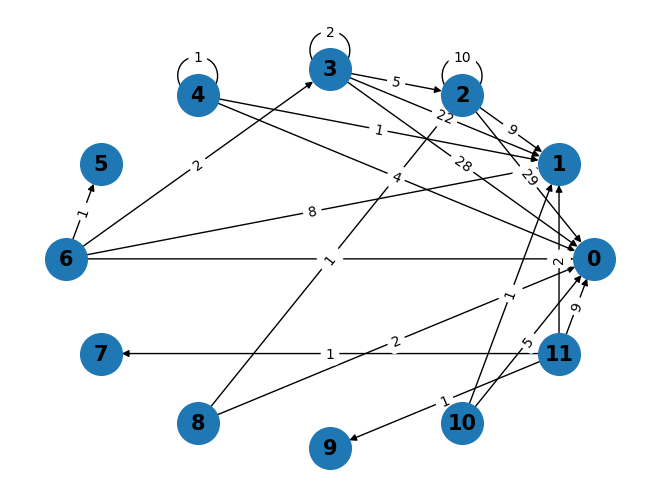

In [27]:

G1 = nx.from_numpy_array(np.matrix(np.array(adj_mat)), create_using=nx.DiGraph)
layout = nx.circular_layout(G1)
nx.draw(G1, layout, node_size=900, with_labels=True, font_weight='bold',    font_size=15)
labels = nx.get_edge_attributes(G1,'weight')
nx.draw_networkx_edge_labels(G1,pos=layout,edge_labels=labels)
plt.show()

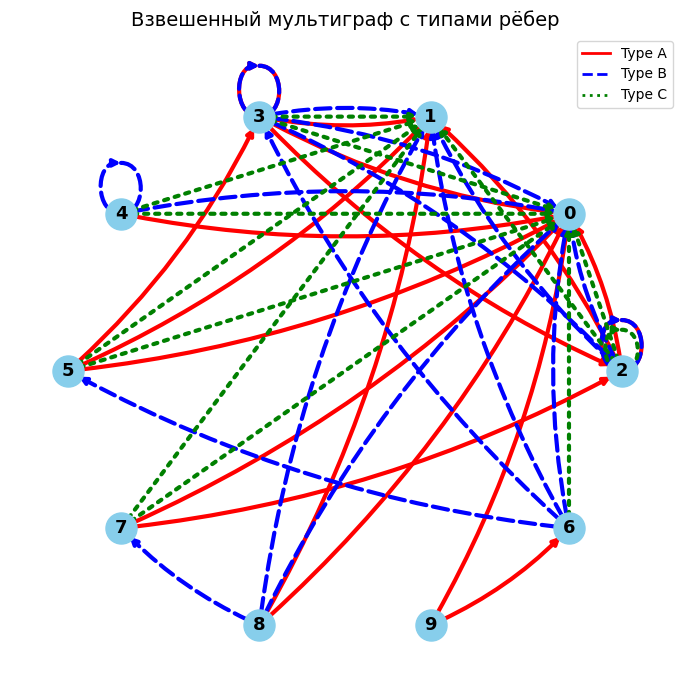

In [53]:
from collections import defaultdict


def draw_labeled_multigraph(G, edge_types, ax=None):
    """
    Улучшенная визуализация мультиграфа с параллельными рёбрами разных типов.
    """
    if ax is None:
        _, ax = plt.subplots(figsize=(7, 7))

    # Стили для рёбер разных типов
    edge_styles = {
        'A': {'color': 'red', 'style': 'solid', 'width': 3},
        'B': {'color': 'blue', 'style': 'dashed', 'width': 3},
        'C': {'color': 'green', 'style': 'dotted', 'width': 3}
    }

    # Позиции вершин
    pos = nx.circular_layout(G)

    # Рисуем вершины
    nx.draw_networkx_nodes(G, pos, node_color='skyblue', node_size=500, ax=ax, )
    nx.draw_networkx_labels(G, pos, font_size=13, font_weight='bold', ax=ax)

    # Рисуем рёбра с разными стилями
    curvature = {'A': 0.1, 'B': -0.1, 'C': 0}
    for edge_type, edges in edge_types.items():
        nx.draw_networkx_edges(
            G, pos, edgelist=edges,
            edge_color=edge_styles[edge_type]['color'],
            style=edge_styles[edge_type]['style'],
            width=edge_styles[edge_type]['width'],
            connectionstyle=f"arc3,rad={curvature[edge_type]}",
            ax=ax
        )

    # Подписи весов (ваш предпочтительный способ)
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=17, label_pos = 0.6)

    # Легенда
    legend_elements = [
        plt.Line2D([0], [0], color=style['color'], linestyle=style['style'],
                  label=f'Type {etype}', linewidth=2)
        for etype, style in edge_styles.items()
    ]
    ax.legend(handles=legend_elements, loc='best')

    plt.title("Взвешенный мультиграф с типами рёбер", fontsize=14)
    plt.axis('off')
    plt.tight_layout()
    return ax


# Пример использования (адаптировать под ваши данные)
adj_A = weighted_adj_matrix(graph_patient_df[graph_patient_df['class'] == 1])
adj_B = weighted_adj_matrix(graph_patient_df[graph_patient_df['class'] == 2])
adj_C = weighted_adj_matrix(graph_patient_df[graph_patient_df['class'] == 3])


node_names = list(range(len(adj_A)))  # Или ваши названия узлов

# Создаём мультиграф
G = nx.MultiDiGraph()

edge_types = defaultdict(list)

def add_edges_from_matrix(matrix, edge_type):
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            weight = matrix.iloc[i,j]
            if weight > 0:
                source = node_names[i]
                target = node_names[j]
                G.add_edge(source, target, weight=weight, type=edge_type)
                edge_types[edge_type].append((source, target))

add_edges_from_matrix(adj_A, 'A')
add_edges_from_matrix(adj_B, 'B')
add_edges_from_matrix(adj_C, 'C')

# Визуализация
draw_labeled_multigraph(G, edge_types)
plt.show()

# Model Graph Neural Network

In [29]:
import torch.nn.functional as F
from torch.nn import Linear, Dropout
from torch_geometric.nn import GCNConv, GATv2Conv


class GCN(torch.nn.Module):
    """Graph Convolutional Network"""
    def __init__(self, dim_in, dim_h, dim_out):
        super().__init__()
        self.gcn1 = GCNConv(dim_in, dim_h)
        self.gcn2 = GCNConv(dim_h, dim_h)
        self.gcn3 = GCNConv(dim_h, dim_out)
        self.optimizer = torch.optim.Adam(self.parameters(),
                                          lr=0.01,
                                          weight_decay=5e-4)

    def forward(self, x, edge_index):
        h = F.dropout(x, p=0.5, training=self.training)
        h = self.gcn1(h, edge_index)
        h = torch.relu(h)
        h = F.dropout(h, p=0.5, training=self.training)
        h = self.gcn2(h, edge_index)
        return h, F.log_softmax(h, dim=1)



class GAT(torch.nn.Module):
    """Graph Attention Network"""
    def __init__(self, dim_in, dim_h, dim_out, heads=4):
        super().__init__()
        self.gat1 = GATv2Conv(dim_in, dim_h, heads=heads)
        self.gat2 = GATv2Conv(dim_h*heads, dim_out, heads=1)
        self.optimizer = torch.optim.Adam(self.parameters(),
                                          lr=0.005,
                                          weight_decay=5e-4)

    def forward(self, x, edge_index):
        h = F.dropout(x, p=0.6, training=self.training)
        h = self.gat1(x, edge_index)
        h = F.elu(h)
        h = F.dropout(h, p=0.6, training=self.training)
        h = self.gat2(h, edge_index)
        return h, F.log_softmax(h, dim=1)

def graph_model_accuracy(pred_y, y):
    """Calculate accuracy."""
    return ((pred_y == y).sum() / len(y)).item()

def graph_model_train(model, data):
    """Train a GNN model and return the trained model."""
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = model.optimizer
    epochs = 300
    acc_ts = []

    model.train()
    for epoch in range(epochs+1):
        # Training
        optimizer.zero_grad()
        _, out = model(data.x, data.edge_index)
        loss = criterion(out[data.train_mask], data.y[data.train_mask])
        acc = graph_model_accuracy(out[data.train_mask].argmax(dim=1), data.y[data.train_mask])
        loss.backward()
        optimizer.step()

        # Validation
        val_loss = criterion(out[data.val_mask], data.y[data.val_mask])
        val_acc = graph_model_accuracy(out[data.val_mask].argmax(dim=1), data.y[data.val_mask])

        # Print metrics every 10 epochs
        if(epoch % 10 == 0):
            print(f'Epoch {epoch:>3} | Train Loss: {loss:.3f} | Train Acc: '
                  f'{acc*100:>6.2f}% | Val Loss: {val_loss:.2f} | '
                  f'Val Acc: {val_acc*100:.2f}%')
        acc_ts = np.append(acc_ts, val_acc)

    return model, acc_ts

def graph_model_test(model, data):
    """Evaluate the model on test set and print the accuracy score."""
    model.eval()
    _, out = model(data.x, data.edge_index)
    acc = graph_model_accuracy(out.argmax(dim=1)[data.test_mask], data.y[data.test_mask])
    return acc

In [30]:
import torch
import torch.nn.functional as F
from torch.nn import Linear, Dropout
from torch_geometric.nn import GCNConv, GATv2Conv


class GCN(torch.nn.Module):
    """Graph Convolutional Network for 3-class classification"""
    def __init__(self, dim_in, dim_h, dim_out=3):  # dim_out=3 for 3 classes
        super().__init__()
        self.gcn1 = GCNConv(dim_in, dim_h)
        self.gcn2 = GCNConv(dim_h, dim_h)
        self.gcn3 = GCNConv(dim_h, dim_out)
        self.optimizer = torch.optim.Adam(self.parameters(),
                                        lr=0.01,
                                        weight_decay=5e-4)

    def forward(self, x, edge_index):
        h = F.dropout(x, p=0.5, training=self.training)
        h = self.gcn1(h, edge_index)
        h = torch.relu(h)
        h = F.dropout(h, p=0.5, training=self.training)
        h = self.gcn2(h, edge_index)
        h = torch.relu(h)
        h = F.dropout(h, p=0.5, training=self.training)
        h = self.gcn3(h, edge_index)
        return h, F.log_softmax(h, dim=1)


class GAT(torch.nn.Module):
    """Graph Attention Network for 3-class classification"""
    def __init__(self, dim_in, dim_h, dim_out=3, heads=4):  # dim_out=3 for 3 classes
        super().__init__()
        self.gat1 = GATv2Conv(dim_in, dim_h, heads=heads)
        self.gat2 = GATv2Conv(dim_h*heads, dim_out, heads=1)
        self.optimizer = torch.optim.Adam(self.parameters(),
                                        lr=0.005,
                                        weight_decay=5e-4)

    def forward(self, x, edge_index):
        h = F.dropout(x, p=0.6, training=self.training)
        h = self.gat1(x, edge_index)
        h = F.elu(h)
        h = F.dropout(h, p=0.6, training=self.training)
        h = self.gat2(h, edge_index)
        return h, F.log_softmax(h, dim=1)


def graph_model_accuracy(pred_y, y):
    """Calculate accuracy for multi-class classification"""
    return ((pred_y == y).sum() / len(y)).item()


def graph_model_train(model, data):
    """Train a GNN model and return the trained model."""
    # Ensure labels are 0-based (0,1,2 if original labels were 1,2,3)
    if data.y.min() > 0:
        data.y = data.y - 1  # Convert 1,2,3 to 0,1,2

    criterion = torch.nn.CrossEntropyLoss()
    optimizer = model.optimizer
    epochs = 300
    acc_ts = []

    model.train()
    for epoch in range(epochs+1):
        # Training
        optimizer.zero_grad()
        _, out = model(data.x, data.edge_index)
        loss = criterion(out[data.train_mask], data.y[data.train_mask])
        acc = graph_model_accuracy(out[data.train_mask].argmax(dim=1), data.y[data.train_mask])
        loss.backward()
        optimizer.step()

        # Validation
        val_loss = criterion(out[data.val_mask], data.y[data.val_mask])
        val_acc = graph_model_accuracy(out[data.val_mask].argmax(dim=1), data.y[data.val_mask])

        # Print metrics every 10 epochs
        if epoch % 10 == 0:
            print(f'Epoch {epoch:>3} | Train Loss: {loss:.3f} | Train Acc: '
                f'{acc*100:>6.2f}% | Val Loss: {val_loss:.2f} | '
                f'Val Acc: {val_acc*100:.2f}%')
        acc_ts = np.append(acc_ts, val_acc)

    return model, acc_ts


def graph_model_test(model, data):
    """Evaluate the model on test set and print the accuracy score."""
    # Ensure labels are 0-based (0,1,2 if original labels were 1,2,3)
    if data.y.min() > 0:
        data.y = data.y - 1

    model.eval()
    _, out = model(data.x, data.edge_index)
    acc = graph_model_accuracy(out.argmax(dim=1)[data.test_mask], data.y[data.test_mask])

    # Convert predictions back to original class labels if needed
    preds = out.argmax(dim=1)[data.test_mask] + 1  # Convert back to 1,2,3
    true = data.y[data.test_mask] + 1

    return acc, preds, true

In [31]:
def create_random_masks(total_nodes, train_percent, test_percent, val_percent):
    """
    Создает случайно распределенные маски для train, test и validation наборов

    Параметры:
    total_nodes (int): Общее количество узлов
    train_percent (float): Процент узлов для обучения (0-1)
    test_percent (float): Процент узлов для тестирования (0-1)
    val_percent (float): Процент узлов для валидации (0-1)

    Возвращает:
    tuple: (train_mask, test_mask, val_mask) - три булевых массива со случайным распределением
    """
    # Проверка корректности процентов
    assert np.isclose(train_percent + test_percent + val_percent, 1.0), \
        "Сумма процентов должна быть равна 1"

    # Создаем массив для хранения всех меток
    labels = np.empty(total_nodes, dtype=np.int8)

    # Вычисляем количество узлов для каждой категории
    train_count = int(train_percent * total_nodes)
    test_count = int(test_percent * total_nodes)
    val_count = total_nodes - train_count - test_count

    # Заполняем массив метками (0 - train, 1 - test, 2 - val)
    labels[:train_count] = 0
    labels[train_count:train_count+test_count] = 1
    labels[train_count+test_count:] = 2

    # Случайно перемешиваем метки
    np.random.shuffle(labels)

    # Создаем булевы маски
    train_mask = (labels == 0)
    test_mask = (labels == 1)
    val_mask = (labels == 2)

    return train_mask, test_mask, val_mask

# Пример использования:
total_nodes = data.x.shape[0]  # Меньшее количество для наглядности
train_percent = 0.7  # 60%
test_percent = 0.2    # 20%
val_percent = 0.1     # 20%

train_mask, test_mask, val_mask = create_random_masks(total_nodes, train_percent, test_percent, val_percent)


data.train_mask = torch.tensor(train_mask, dtype=torch.bool)
data.test_mask = torch.tensor(test_mask, dtype=torch.bool)
data.val_mask = torch.tensor(val_mask, dtype=torch.bool)

GCN(
  (gcn1): GCNConv(4, 16)
  (gcn2): GCNConv(16, 16)
  (gcn3): GCNConv(16, 3)
)
Epoch   0 | Train Loss: 19.288 | Train Acc:  23.81% | Val Loss: 6.26 | Val Acc: 20.00%
Epoch  10 | Train Loss: 4.371 | Train Acc:  38.10% | Val Loss: 4.78 | Val Acc: 20.00%
Epoch  20 | Train Loss: 2.123 | Train Acc:  40.95% | Val Loss: 2.29 | Val Acc: 26.67%
Epoch  30 | Train Loss: 1.596 | Train Acc:  28.57% | Val Loss: 1.26 | Val Acc: 46.67%
Epoch  40 | Train Loss: 1.252 | Train Acc:  30.48% | Val Loss: 1.07 | Val Acc: 60.00%
Epoch  50 | Train Loss: 1.139 | Train Acc:  38.10% | Val Loss: 1.08 | Val Acc: 33.33%
Epoch  60 | Train Loss: 1.106 | Train Acc:  43.81% | Val Loss: 1.04 | Val Acc: 53.33%
Epoch  70 | Train Loss: 1.078 | Train Acc:  38.10% | Val Loss: 1.09 | Val Acc: 40.00%
Epoch  80 | Train Loss: 1.109 | Train Acc:  35.24% | Val Loss: 1.11 | Val Acc: 46.67%
Epoch  90 | Train Loss: 1.053 | Train Acc:  45.71% | Val Loss: 1.11 | Val Acc: 40.00%
Epoch 100 | Train Loss: 1.095 | Train Acc:  40.95% | Val

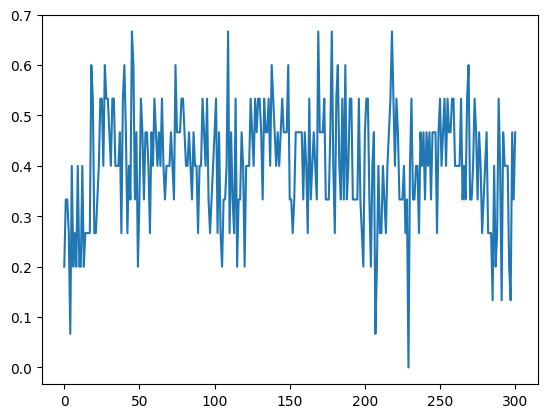

In [32]:
%%time

# Initialize model
model = GCN(dim_in=data.num_features, dim_h=16)
print(model)


# Train model
trained_model, acc_history = graph_model_train(model, data)

# Test model
test_acc, preds, true = graph_model_test(trained_model, data)

print(f'\nGCN test accuracy: {test_acc*100:.2f}%\n')


plt.plot(acc_history)

GAT(
  (gat1): GATv2Conv(4, 16, heads=4)
  (gat2): GATv2Conv(64, 3, heads=1)
)
Epoch   0 | Train Loss: 11.929 | Train Acc:  36.19% | Val Loss: 4.70 | Val Acc: 53.33%
Epoch  10 | Train Loss: 6.814 | Train Acc:  36.19% | Val Loss: 13.67 | Val Acc: 0.00%
Epoch  20 | Train Loss: 3.149 | Train Acc:  43.81% | Val Loss: 3.70 | Val Acc: 13.33%
Epoch  30 | Train Loss: 1.836 | Train Acc:  44.76% | Val Loss: 1.93 | Val Acc: 33.33%
Epoch  40 | Train Loss: 1.390 | Train Acc:  51.43% | Val Loss: 1.74 | Val Acc: 40.00%
Epoch  50 | Train Loss: 1.085 | Train Acc:  55.24% | Val Loss: 1.86 | Val Acc: 33.33%
Epoch  60 | Train Loss: 1.058 | Train Acc:  51.43% | Val Loss: 1.26 | Val Acc: 46.67%
Epoch  70 | Train Loss: 0.991 | Train Acc:  46.67% | Val Loss: 1.34 | Val Acc: 40.00%
Epoch  80 | Train Loss: 0.920 | Train Acc:  52.38% | Val Loss: 1.27 | Val Acc: 26.67%
Epoch  90 | Train Loss: 0.805 | Train Acc:  63.81% | Val Loss: 1.03 | Val Acc: 40.00%
Epoch 100 | Train Loss: 0.812 | Train Acc:  58.10% | Val Los

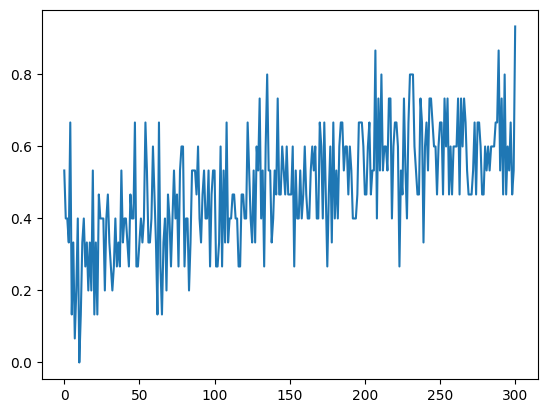

In [33]:
%%time
# Initialize model
model = GAT(dim_in=data.num_features, dim_h=16)
print(model)

# Train model
trained_model, acc_history = graph_model_train(model, data)

# Test model
test_acc, preds, true = graph_model_test(trained_model, data)

print(f'\nGCN test accuracy: {test_acc*100:.2f}%\n')


plt.plot(acc_history)

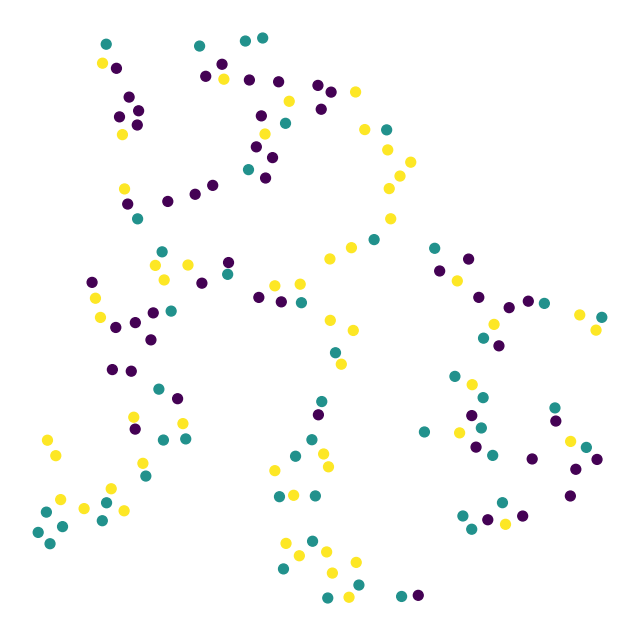

In [34]:
untrained_gat = GAT(data.x.shape[1],16, data.num_classes)


# Get embeddings
h, _ = untrained_gat(data.x, data.edge_index)


tsne = TSNE(n_components=2, learning_rate='auto',
                        perplexity=10.0,
         init='pca').fit_transform(h.detach())

plt.figure(figsize=(8, 8))
plt.axis('off')
plt.scatter(tsne[:, 0], tsne[:, 1], s=50, c=data.y)
plt.show()

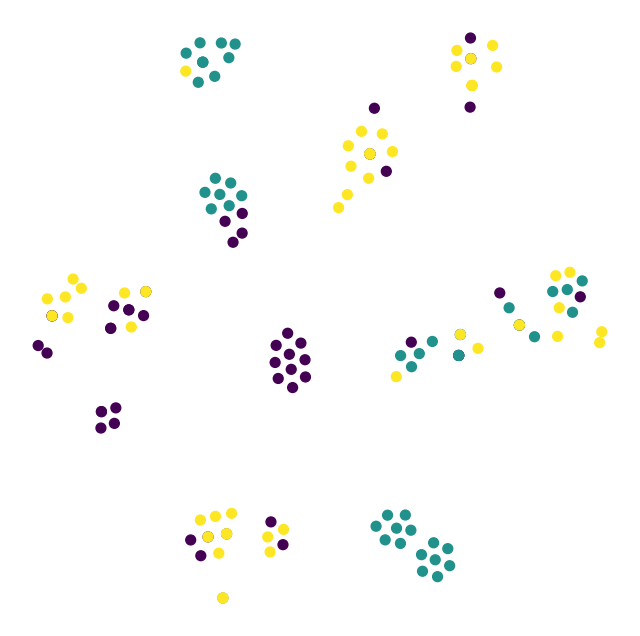

In [35]:

h, _ = model(data.x, data.edge_index)

# Train TSNE
tsne = TSNE(n_components=2, learning_rate='auto',
            perplexity=10.0,
            init='pca').fit_transform(h.detach())


plt.figure(figsize=(8, 8))
plt.axis('off')
plt.scatter(tsne[:, 0], tsne[:, 1], s=50, c=data.y)
plt.show()


# Create Tensor Network

In [36]:
# A, nfeat, nhid, nout
T=GraphNet(A,X.size(0), 10, 2)

RuntimeError: Boolean value of Tensor with more than one value is ambiguous

In [ ]:
criterion = torch.nn.CrossEntropyLoss(ignore_index=-1)
optimizer = optim.SGD(T.parameters(), lr=0.01, momentum=0.9)
loss=criterion(T(X),target)

In [ ]:
l=T(X)
plt.scatter(l.detach().numpy()[:,0],l.detach().numpy()[:,1],c=[0, 0, 0, 0 ,0 ,0 ,0, 0, 1, 1, 0 ,0, 0, 0, 1 ,1 ,0 ,0 ,1, 0, 1, 0 ,1 ,1, 1, 1, 1 ,1 ,1, 1, 1, 1, 1, 1 ])


In [ ]:
for i in range(200):
    optimizer.zero_grad()
    loss=criterion(T(X), target)
    loss.backward()
    optimizer.step()
    l=(T(X));
    if i%20==0:
      print("Cross Entropy Loss: =", loss.item())

In [ ]:
plt.scatter(l.detach().numpy()[:,0],l.detach().numpy()[:,1],c=[0, 0, 0, 0 ,0 ,0 ,0, 0, 1, 1, 0 ,0, 0, 0, 1 ,1 ,0 ,0 ,1, 0, 1, 0 ,1 ,1, 1, 1, 1 ,1 ,1, 1, 1, 1, 1, 1 ])
